In [2]:
from zipfile import ZipFile
dataset='archive (1).zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print ('The dataset is extracted')

The dataset is extracted


In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image 

In [4]:
with_mask_files=os.listdir('data\with_mask')
print(with_mask_files[0:5])

['with_mask_1040.jpg', 'with_mask_1041.jpg', 'with_mask_1042.jpg', 'with_mask_1043.jpg', 'with_mask_1044.jpg']


In [5]:
without_mask_files=os.listdir('data\without_mask')
print(len(with_mask_files))
print(len(without_mask_files))

3678
3828


creating labels for the two class of Images
withmask ->1
withoutmask->0

In [6]:
#creating the labels
with_mask_labels=[1]*3678
without_mask_labels=[0]*3828


In [7]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [8]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3678
3828


In [9]:
labels=with_mask_labels+without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7506
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

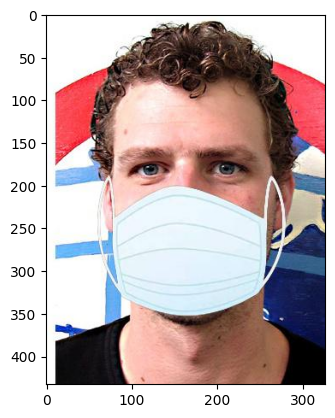

In [10]:
#displaying with mask images
img=mpimg.imread('data\with_mask\with_mask_1041.jpg')#it read the images as numpy array 
imgplot=plt.imshow(img)
# plt.imshow(mpimg.imread(img))

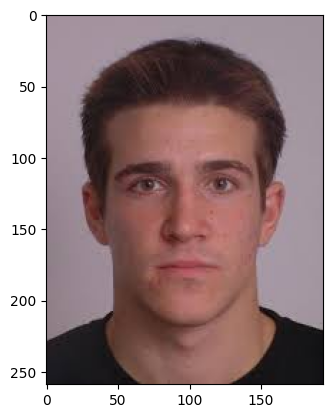

In [11]:
#displaying without mask images
img=mpimg.imread('data\without_mask\without_mask_1041.jpg')#it read the images as numpy array 
imgplot=plt.imshow(img)

## **Image processing**

Resize the images
convert the images to numpy arrays

In [12]:
#convert images to numpy arrrays
with_mask_path='data\with_mask/'
data=[]
for img_file in with_mask_files:
    image=Image.open(with_mask_path+img_file)
    image=image.resize((80,80))
    image=image.convert('RGB')#we use to to convert the black and white image into rgb color channel because we cant make a model wo can work on both color and colorless images
    image=np.array(image)
    data.append(image)




without_mask_path='data\without_mask/'

for img_file in without_mask_files:
    image=Image.open(without_mask_path+img_file)
    image=image.resize((80,80))
    image=image.convert('RGB')#we use to to convert the black and white image into rgb color channel because we cant make a model wo can work on both color and colorless images
    image=np.array(image)
    data.append(image)

c:\Users\RAVI RANJAN SINHA\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
len(data)

7506

In [14]:
type(data)

list

In [15]:
data[0]#these are the picsel of the images 

array([[[135, 115, 116],
        [148, 128, 129],
        [159, 139, 139],
        ...,
        [ 65,  50,  46],
        [ 60,  46,  41],
        [ 57,  44,  39]],

       [[147, 128, 128],
        [156, 137, 138],
        [170, 150, 150],
        ...,
        [ 66,  49,  44],
        [ 59,  45,  39],
        [ 56,  43,  36]],

       [[152, 134, 134],
        [163, 145, 145],
        [177, 158, 157],
        ...,
        [ 69,  52,  45],
        [ 62,  45,  38],
        [ 60,  44,  37]],

       ...,

       [[253, 251, 254],
        [254, 252, 254],
        [255, 251, 252],
        ...,
        [131,  95,  92],
        [116,  84,  80],
        [ 99,  67,  64]],

       [[252, 252, 254],
        [251, 251, 253],
        [253, 251, 252],
        ...,
        [112,  83,  78],
        [ 88,  61,  57],
        [ 64,  39,  35]],

       [[254, 254, 255],
        [253, 253, 255],
        [254, 252, 254],
        ...,
        [ 78,  55,  48],
        [ 56,  36,  29],
        [ 42,  23,  18]]

In [16]:
type(data[0])

numpy.ndarray

In [17]:
data[0].shape#here 128 is width and length and 3 is the RGB color

(80, 80, 3)

In [18]:
#conveting image list and label list to numpy arrays

x=np.array(data)
y=np.array(labels)


In [19]:
type(x)

numpy.ndarray

In [20]:
print(x.shape)
print(y.shape)

(7506, 80, 80, 3)
(7506,)


In [21]:
print(y)

[1 1 1 ... 0 0 0]


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
print (x.shape,x_train.shape,x_test.shape)

(7506, 80, 80, 3) (6004, 80, 80, 3) (1502, 80, 80, 3)


In [24]:
#scaling a data
x_train_scaled=x_train/255#to arrange the color according to pixel we have 255 possible value 
x_test_scaled=x_test/255


## **Building a CNN**

In [25]:
import tensorflow as tf 
from tensorflow import keras


In [26]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(80,80,3)))#input shape should be present in the first layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

In [27]:
#compile the neural network 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [28]:
#training the neural network
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
169/169 [==============================] - 24s 134ms/step - loss: 0.4564 - acc: 0.7886 - val_loss: 0.3141 - val_acc: 0.8785
Epoch 2/5
169/169 [==============================] - 22s 130ms/step - loss: 0.2800 - acc: 0.8836 - val_loss: 0.2683 - val_acc: 0.8968
Epoch 3/5
169/169 [==============================] - 23s 136ms/step - loss: 0.2218 - acc: 0.9152 - val_loss: 0.2516 - val_acc: 0.9018
Epoch 4/5
169/169 [==============================] - 23s 136ms/step - loss: 0.1839 - acc: 0.9282 - val_loss: 0.2473 - val_acc: 0.9135
Epoch 5/5
169/169 [==============================] - 23s 136ms/step - loss: 0.1548 - acc: 0.9406 - val_loss: 0.2264 - val_acc: 0.9168


## **model evaluation**

In [29]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print('test Accuracy=',accuracy)

47/47 [==============================] - 2s 34ms/step - loss: 0.1915 - acc: 0.9334
test Accuracy= 0.9334220886230469


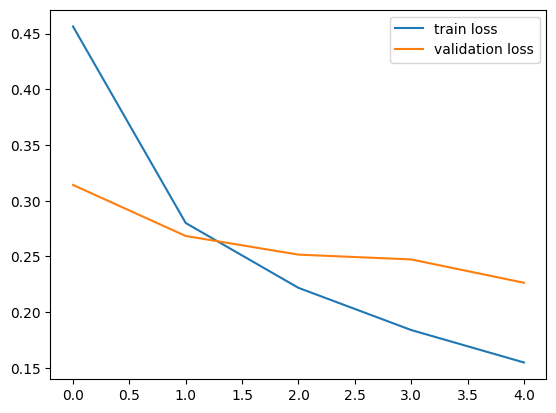

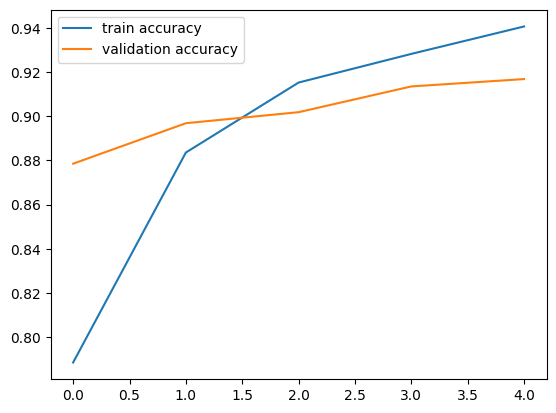

In [30]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accurracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

In [39]:
import cv2
# input_image_path=input('give the pathh of the image')
 

input_image=cv2.imread("data\with_mask\with_mask_7.jpg")
# cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(80,80))
input_image_scaled=input_image_resize/255

input_image_reshaped=np.reshape(input_image_scaled,[1,80,80,3])
 
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_prediction)

if input_pred_label==1:
     print('the person in the image is wearing a mask')
else:
     print('the person is not wearing the mask')

1/1 [==============================] - 0s 363ms/step
[[0.5366898 0.559711 ]]
[[0.5366898 0.559711 ]]
the person in the image is wearing a mask


In [41]:
import cv2
# input_image_path=input('give the pathh of the image')
 

input_image=cv2.imread("data\without_mask\without_mask_7.jpg")
# cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(80,80))
input_image_scaled=input_image_resize/255

input_image_reshaped=np.reshape(input_image_scaled,[1,80,80,3])
 
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_prediction)

if input_pred_label==1:
     print('the person in the image is wearing a mask')
else:
     print('the person is not wearing the mask')

1/1 [==============================] - 0s 35ms/step
[[0.4197796  0.73399633]]
[[0.4197796  0.73399633]]
the person in the image is wearing a mask
